In [56]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
def calc_sec(time):
    hms = time.split(':')
    hms = [float(x) for x in hms]
    sec = hms[2] + hms[1]*60 + hms[0]*3600
    sec = round(sec,3)
    return sec

In [58]:
def calc_ts(sec):
    ts = ''
    hr = int(sec/3600)
    mn = int((sec - (hr*3600))/60)
    sc = sec - (hr*3600) - (mn*60)
    sc = round(sc,3)
    ts += str(hr) + ':' + str(mn) + ':' + str(sc)
    # print(ts)
    return ts

In [59]:
def calc_t_period(dates,secs):
    t_period = []
    
    start_sec = secs[0]
    prev_sec = secs[0]
    prev_date = dates[0]
    
#     print(prev_date,prev_sec)

    for i in range(len(secs)):
        curr_sec = secs[i]
        diff_sec = curr_sec - prev_sec
        curr_date = dates[i]
        
#         print(curr_sec,prev_sec)
        
        if((diff_sec>3.0)&(curr_date==prev_date)):
            t_period.append([curr_date,start_sec,prev_sec])
            start_sec = curr_sec
    #         print(calc_ts(start_sec))
        elif(curr_date!=prev_date):
            t_period.append([prev_date,start_sec,prev_sec])
            start_sec = curr_sec
            prev_date = curr_date
        elif(i==len(secs)-1):
            t_period.append([curr_date,start_sec,curr_sec])

        prev_sec = curr_sec
    
    return t_period

[['2018-10-19' '23:28:59.037' '23:29:54.682']
 ['2018-10-20' '11:21:19.914' '11:21:50.806']
 ['2018-10-20' '11:22:19.251' '11:22:38.652']
 ['2018-10-21' '17:39:29.338' '17:39:59.362']
 ['2018-10-21' '17:41:12.254' '17:41:21.864']
 ['2018-10-21' '17:41:33.649' '17:42:3.774']
 ['2018-10-21' '17:42:56.251' '17:43:0.27']
 ['2018-10-21' '17:43:43.9' '17:44:14.129']
 ['2018-10-21' '17:44:24.262' '17:44:28.909']
 ['2018-10-21' '17:45:56.587' '17:46:26.928']
 ['2018-10-21' '17:47:26.232' '17:47:33.278']
 ['2018-10-21' '17:47:45.516' '17:48:15.803']
 ['2018-10-21' '17:49:27.266' '17:49:36.082']
 ['2018-10-21' '18:45:53.452' '18:46:23.796']
 ['2018-10-21' '18:46:56.229' '18:47:3.126']
 ['2018-10-22' '16:4:47.86' '16:5:18.765']
 ['2018-10-22' '16:6:14.266' '16:6:25.488']
 ['2018-10-22' '16:6:56.148' '16:7:26.466']
 ['2018-10-22' '16:8:31.242' '16:8:37.013']
 ['2018-10-22' '16:45:20.084' '16:45:51.019']
 ['2018-10-22' '16:46:45.231' '16:47:3.981']
 ['2018-10-22' '17:6:39.48' '17:7:9.79']
 ['2018-1

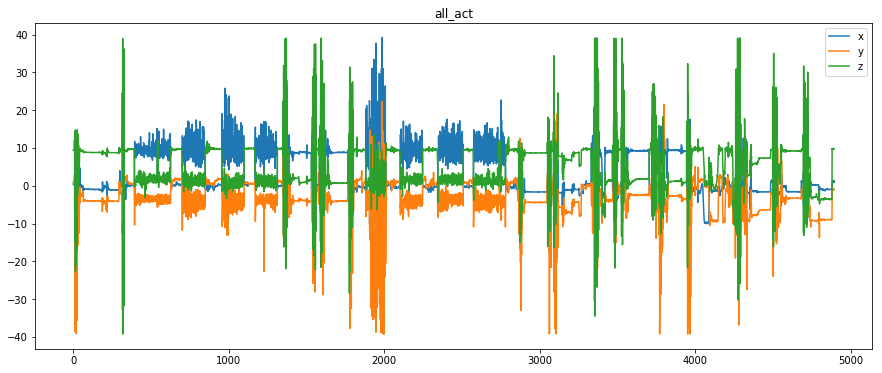

In [60]:
filepath = 'SmartwatchData/raw_data/log_acc_2.csv'

raw_df = pd.read_csv(filepath)

cols = raw_df.columns.tolist()
cols = cols[-1:] + cols[:-1]

raw_df = raw_df[cols]

raw_df.plot(figsize=(15,6),title='all_act')
plt.savefig('all_act.png', dpi=300)

row_len = len(raw_df.index)

dates = [raw_df.iloc[i,0].split(' ')[0] for i in range(row_len)]
secs = [calc_sec(raw_df.iloc[i,0].split(' ')[1]) for i in range(row_len)]

raw_df['date'] = pd.Series(dates, index=raw_df.index)
raw_df['sec'] = pd.Series(secs, index=raw_df.index)

# print(raw_df)

period = calc_t_period(dates,secs)
# print(period)

ts = []
for elem in period:
    ts.append([elem[0],calc_ts(elem[1]),calc_ts(elem[2])])
#     print(elem[2]-elem[1])
    
ts_np = np.array(ts)
print(ts_np)

/Users/admin/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


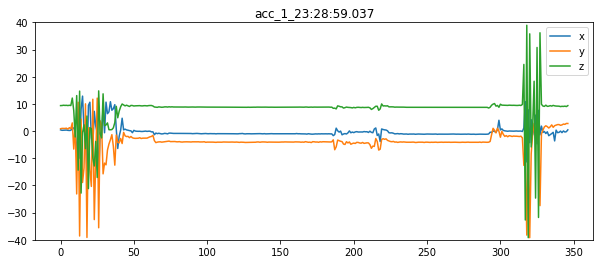

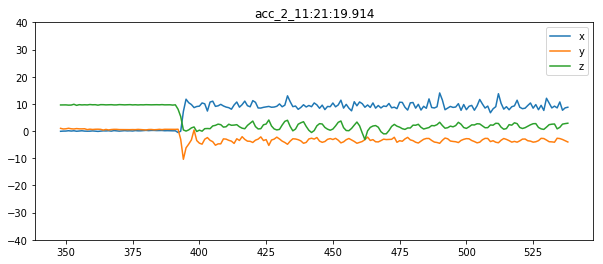

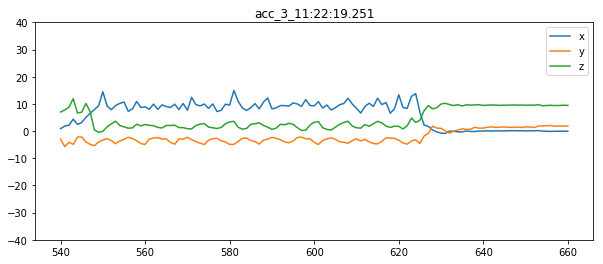

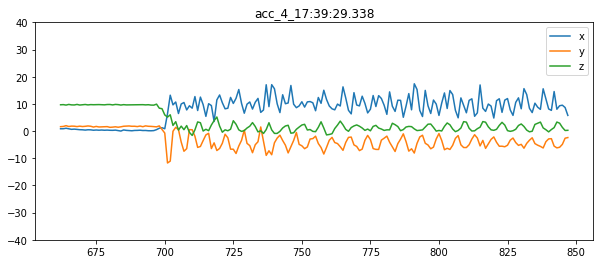

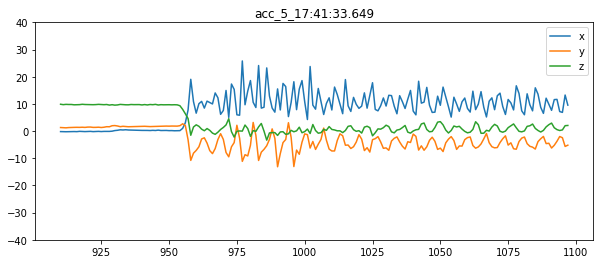

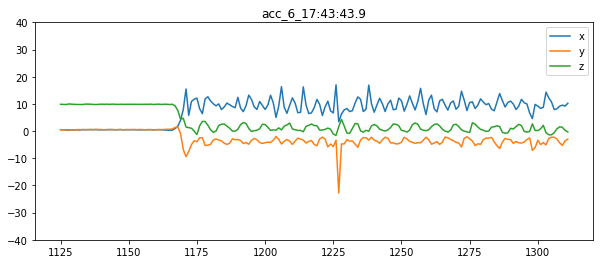

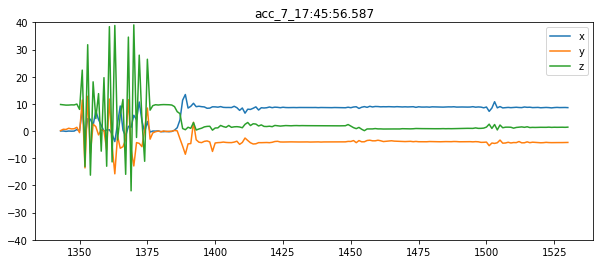

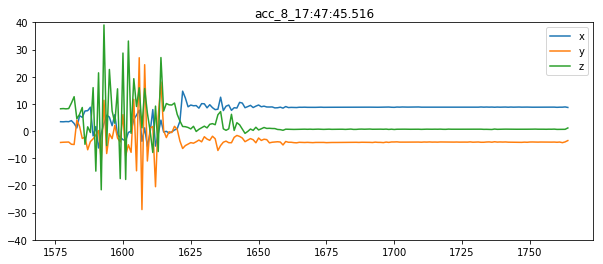

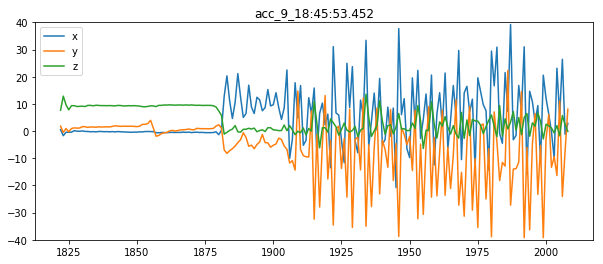

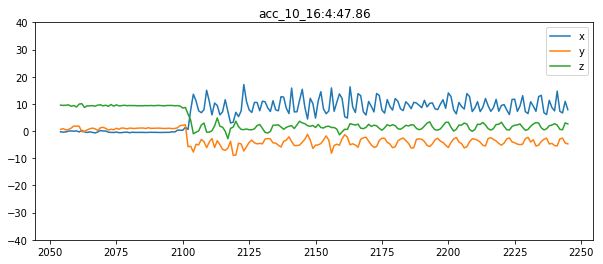

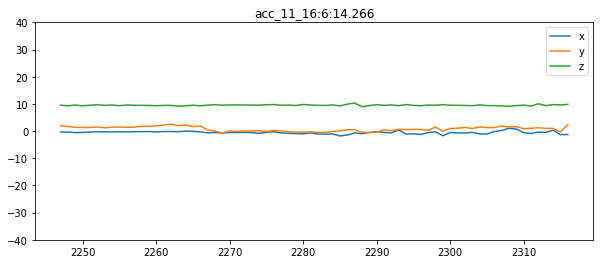

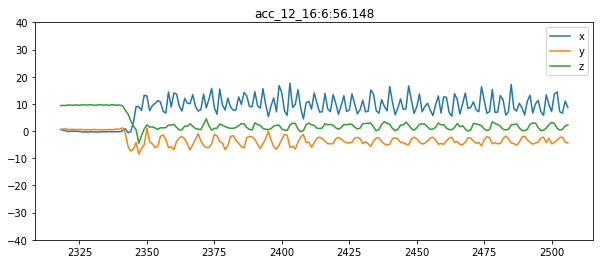

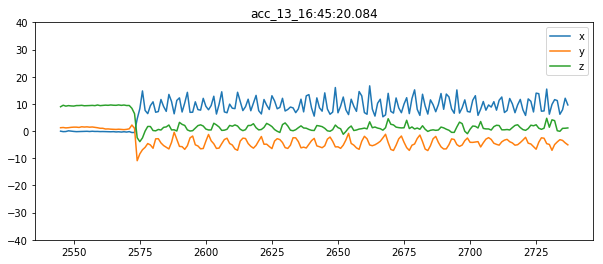

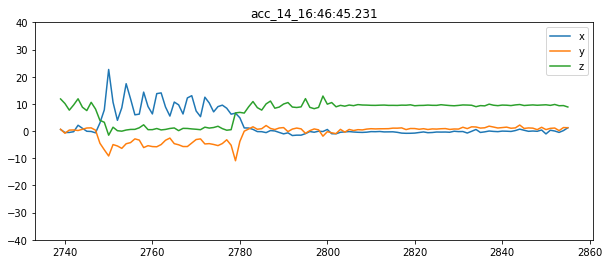

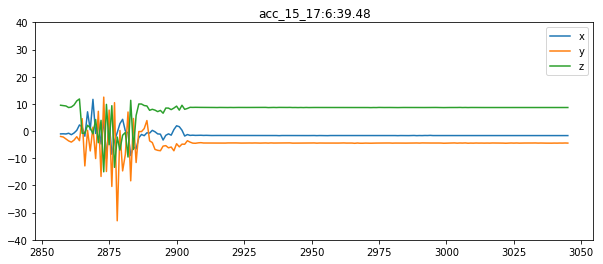

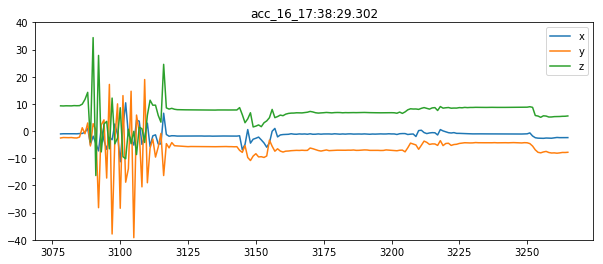

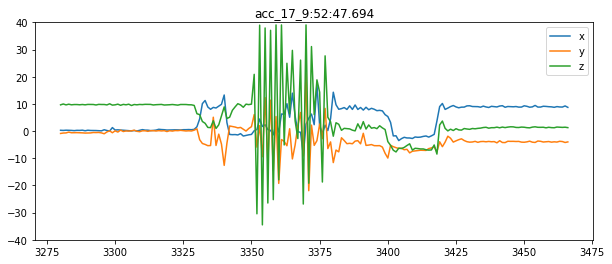

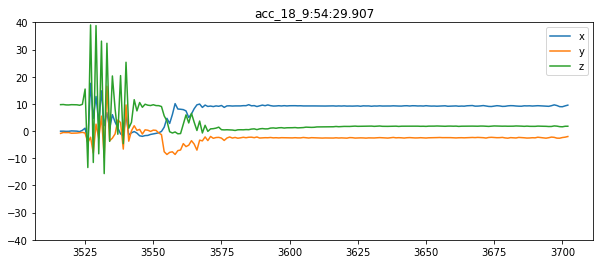

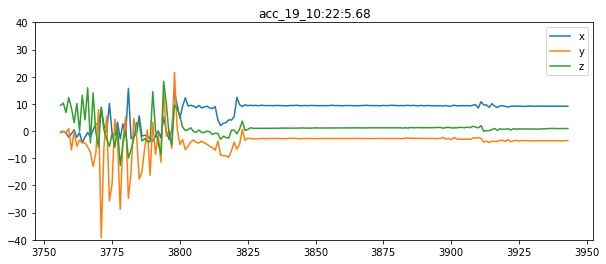

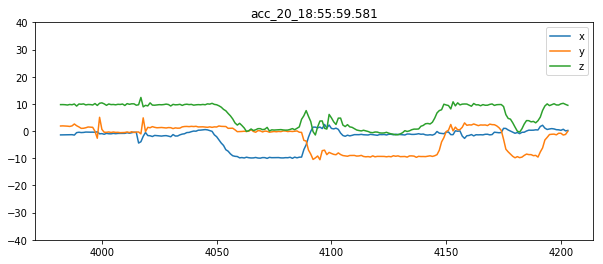

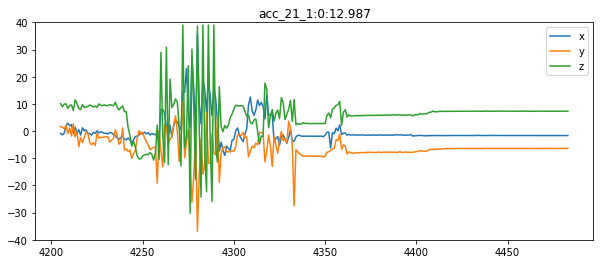

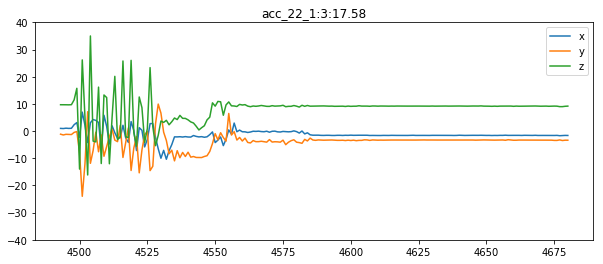

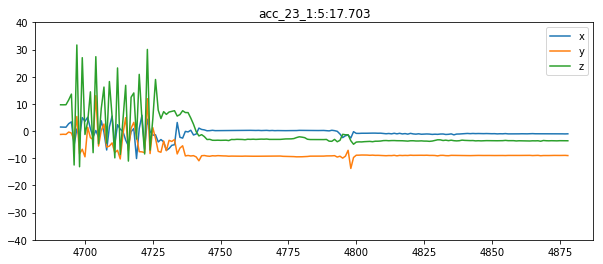

In [61]:
count = 0
cols = ['timestamp','x','y','z']
for elem in period:
    date = elem[0]
    start_t = elem[1]
    end_t = elem[2]
    
    if(end_t-start_t>10):
        for i in range(row_len):
            if(date==raw_df.iloc[i,-2] and start_t==raw_df.iloc[i,-1]):
                start_id = i
            if(date==raw_df.iloc[i,-2] and end_t==raw_df.iloc[i,-1]):
                end_id = i
                count += 1
                new_df = raw_df[start_id:end_id][cols]

#                 plt.figure();
                figname = 'acc_' + str(count) + '_' + calc_ts(start_t)
                
                new_df.plot(figsize=(10,4),title=figname).set_ylim(top=40,bottom=-40)
                plt.savefig(figname + '.png', dpi=300)

                new_df.to_csv(figname + '.csv')
                print('====================')